## Selecting Data for Modeling

In [24]:
!pip install sklearn
import pandas as pd

In [3]:
# save filepath to variable for easier access
melbourne_file_path = 'C:/Users/Kate/Desktop/Data Analysis/Datasets/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Choosing features

In [5]:
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [6]:
X = melbourne_data[melbourne_features]

In [7]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


In [8]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


## Building Model
The steps to building and using a model are:

* Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* Fit: Capture patterns from provided data. This is the heart of modeling.
* Predict: Just what it sounds like
* Evaluate: Determine how accurate the model's predictions are.

Here is an example of defining a `decision tree model` with scikit-learn and fitting it with the features and target variable.

In [9]:
!pip install sklearn

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)
X = melbourne_data[melbourne_features]

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

## Make Prediction
for the first few rows of the training data to see how the predict function works.

In [11]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
The predictions are
[1480000. 1035000. 1465000. ... 1170000. 2500000. 1285000.]


## Model Validation

In [12]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1125.1804614629357

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

248617.146784487


## Underfitting and Overfitting
When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called `overfitting`, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called `underfitting`.

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [15]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  354662
Max leaf nodes: 50  		 Mean Absolute Error:  266447
Max leaf nodes: 500  		 Mean Absolute Error:  231301
Max leaf nodes: 5000  		 Mean Absolute Error:  249163


## Random Forests

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

180860.37877504269


[Text(210.5015401714727, 214.24235294117648, 'X[0] <= 3.5\nmse = 403709136629.996\nsamples = 10185\nvalue = 1075481.269'),
 Text(116.02586493112949, 207.8470588235294, 'X[0] <= 2.5\nmse = 227276240351.029\nsamples = 7623\nvalue = 923704.852'),
 Text(48.02177343621234, 201.45176470588234, 'X[2] <= 85.5\nmse = 131935134646.467\nsamples = 3257\nvalue = 720803.556'),
 Text(16.474363843028943, 195.0564705882353, 'X[0] <= 1.5\nmse = 47251704669.1\nsamples = 1315\nvalue = 553104.718'),
 Text(6.434111504750061, 188.66117647058823, 'X[2] <= 72.5\nmse = 15430768753.258\nsamples = 358\nvalue = 394530.307'),
 Text(3.5316132110106953, 182.26588235294116, 'X[4] <= 144.944\nmse = 13046097025.349\nsamples = 351\nvalue = 388796.581'),
 Text(0.7333812323863447, 175.87058823529412, 'X[3] <= -37.812\nmse = 6277698536.311\nsamples = 73\nvalue = 314219.178'),
 Text(0.22188115830743227, 169.47529411764705, 'X[3] <= -37.856\nmse = 5443222222.222\nsamples = 12\nvalue = 391666.667'),
 Text(0.13654225126611216, 

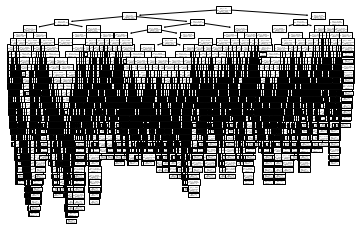

In [20]:
from sklearn import tree
tree.plot_tree(melbourne_model)

KeyError: 0

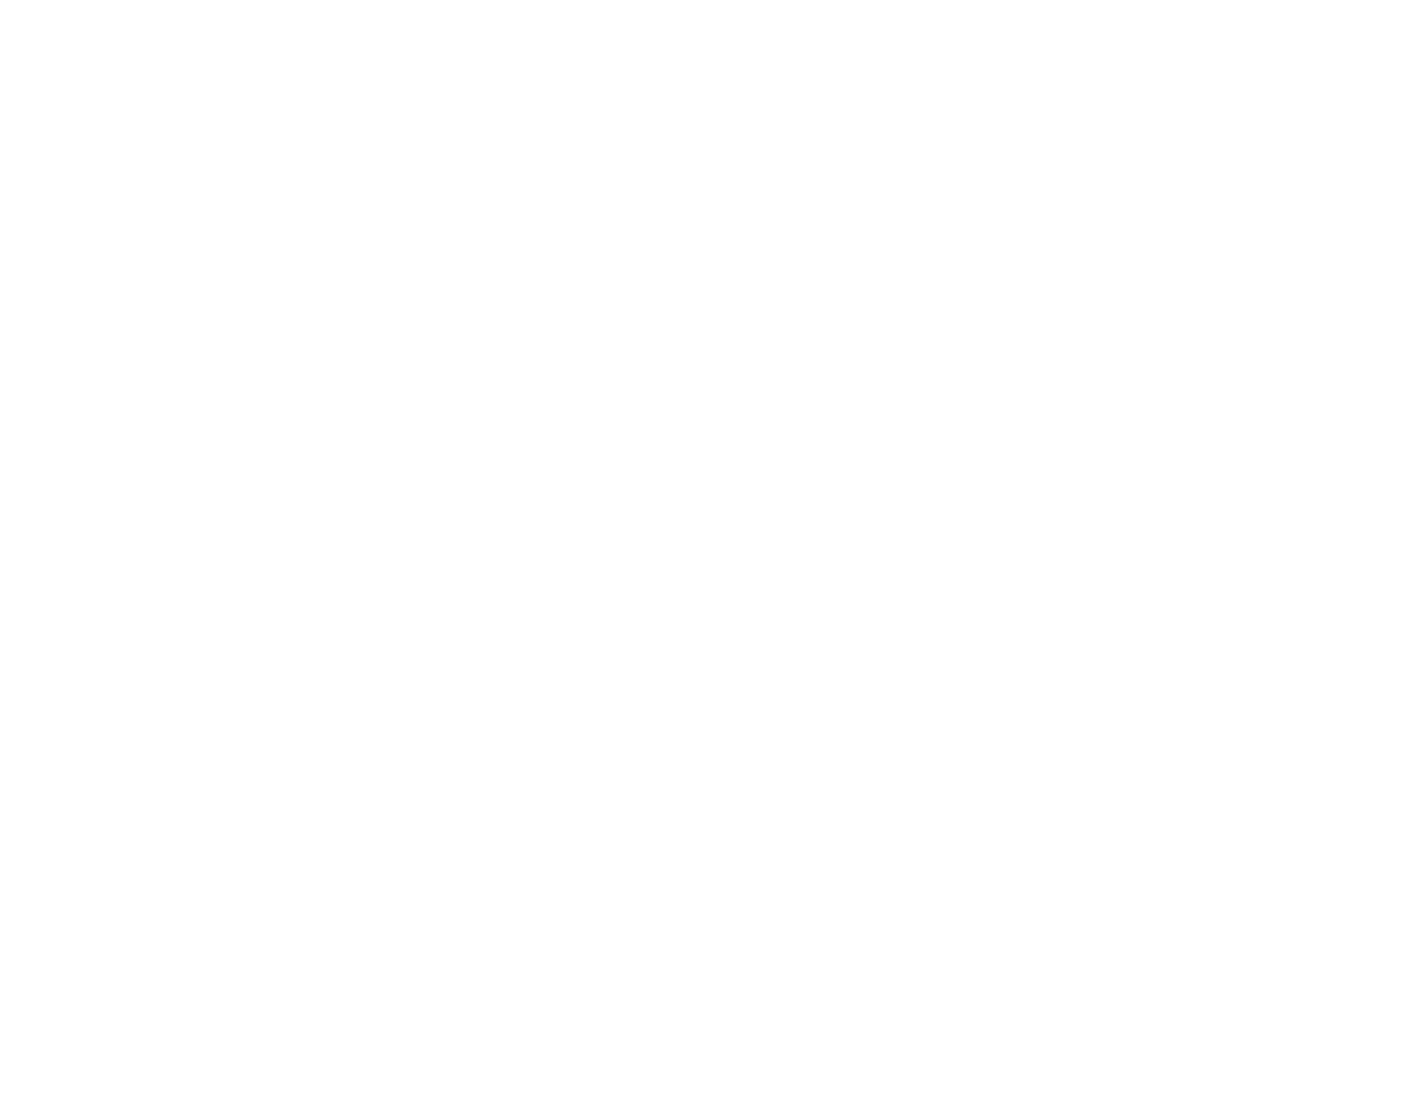

In [23]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(melbourne_model, 
                   feature_names=X,  
                   class_names=y,
                   filled=True)